 # <center>  LAB3 - Interpolacja </center>
# <center>  Gosztyła Mikołaj, Smółka Antoni </center> 


## Zadanie 1. 


Populacja Stanów Zjednoczonych na przestrzeni lat przedstawiała się następująco:

| Rok  | Populacja   |
|------|-------------|
| 1900 | 76 212 168  |
| 1910 | 92 228 496  |
| 1920 | 106 021 537 |
| 1930 | 123 202 624 |
| 1940 | 132 164 569 |
| 1950 | 151 325 798 |
| 1960 | 179 323 175 |
| 1970 | 203 302 031 |
| 1980 | 226 542 199 |

Istnieje dokładnie jeden wielomian ósmego stopnia, który interpoluje powyższe dziewięć punktów, natomiast sam wielomian może być reprezentowany na różne sposoby. Rozważamy następujące zbiory funkcji bazowych φ<sub>j</sub>(t), j = 1 ... 9:

1. φ<sub>j</sub>(t) = t<sup>j-1</sup>
2. φ<sub>j</sub>(t) = (t − 1900)<sup>j-1</sup>
3. φ<sub>j</sub>(t) = (t − 1940)<sup>j-1</sup>
4. φ<sub>j</sub>(t) = ((t − 1940)/40)<sup>j-1</sup>

(a) Dla każdego z czterech zbiorów funkcji bazowych utwórz macierz Vandermonde’a.

(b) Oblicz współczynnik uwarunkowania każdej z powyższych macierzy używając funkcji `numpy.linalg.cond`.

(c) Używając najlepiej uwarunkowanej bazy wielomianów, znajdź współczynniki wielomianu interpolacyjnego dla danych z zadania. Narysuj wielomian interpolacyjny. W tym celu użyj schematu Hornera i oblicz na przedziale [1900,1990] wartości wielomianu w odstępach jednorocznych. Na wykresie umieść także węzły interpolacji.

(d) Dokonaj ekstrapolacji wielomianu do roku 1990. Porównaj otrzymaną wartość z prawdziwą wartością dla roku 1990 wynoszącą 248 709 873. Ile wynosi błąd względny ekstrapolacji dla roku 1990?

(e) Wyznacz wielomian interpolacyjny Lagrange’a na podstawie 9 węzłów interpolacji podanych w zadaniu. Oblicz wartości wielomianu w odstępach jednorocznych.

(f) Wyznacz wielomian interpolacyjny Newtona na podstawie tych samych węzłów interpolacji i oblicz wartości wielomianu w odstępach jednorocznych.

(g) Zaokrąglij dane podane w tabeli do jednego miliona. Na podstawie takich danych wyznacz wielomian interpolacyjny ósmego stopnia używając najlepiej uwarunkowanej bazy z podpunktu (c). Porównaj wyznaczone współczynniki z współczynnikami obliczonymi w podpunkcie (c). Wyjaśnij otrzymany wynik.

---

według Rycerz nie powinno się stosować macierzy Verdemonda do oblicznania tego typu zadań, dobrze za to moze działać wielomian Interpolacyjny Lagrange

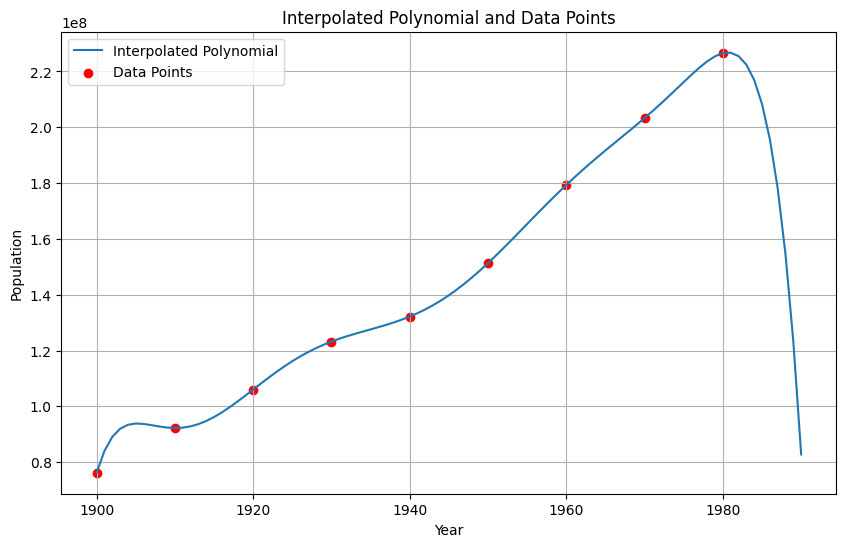

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange, KroghInterpolator


years = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76_212_168, 92_228_496, 106_021_537, 123_202_624, 132_164_569,
                       151_325_798, 179_323_175, 203_302_031, 226_542_199])

def create_vandermonde_matrix(years, base_type):
    if base_type == 1:  # φj(t) = t^(j-1)
        return np.vander(years, increasing=True)
    elif base_type == 2:  # φj(t) = (t - 1900)^(j-1)
        return np.vander(years - 1900, increasing=True)
    elif base_type == 3:  # φj(t) = (t - 1940)^(j-1)
        return np.vander(years - 1940, increasing=True)
    elif base_type == 4:  # φj(t) = ((t - 1940)/40)^(j-1)
        return np.vander((years - 1940) / 40, increasing=True)

cond_numbers = []
for i in range(1, 5):
    V = create_vandermonde_matrix(years, i)
    cond_number = np.linalg.cond(V)
    cond_numbers.append(cond_number)

best_base_type = np.argmin(cond_numbers) + 1
V_best = create_vandermonde_matrix(years, best_base_type)
coefficients = np.linalg.solve(V_best, population)

poly = Polynomial(coefficients)
x_range = np.arange(1900, 1991)
y_interpolated = poly((x_range - 1940) / 40)  # Dla najlepszej bazy

true_value_1990 = 248709873
predicted_1990 = poly((1990 - 1940) / 40)
relative_error = np.abs(predicted_1990 - true_value_1990) / true_value_1990

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_interpolated, label='Interpolated Polynomial')
plt.scatter(years, population, color='red', label='Data Points')
plt.title('Interpolated Polynomial and Data Points')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

